In [38]:
import os

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
from datetime import datetime

from clouds_scripts.path import photos_base_dir
from compute_features import calculate_masked_features, features_calculator, get_masked_image
from connect_rad_photos import connect_rad_photos, extract_time, get_full_path
from multiprocessing import Pool, freeze_support
from path import *

In [39]:
photos =

In [40]:
# delete unused photos or filter them
start_date = pd.to_datetime("2021-08-16 00:50:00")
end_date = pd.to_datetime("2021-08-16 01:10:00")
selection = (photos["photo_time"] > start_date) & (photos["photo_time"] < end_date)
# apply selection
photos = photos[selection]

photos = photos.reset_index(drop=True)

photos

,photos,photo_time,data time,CM3up[W/m2],CG3up[W/m2],CM3down[W/m2],CG3down[W/m2],Temp[C]
0,img-2021-08-16T00-50-07devID2.jpg,2021-08-16 00:50:07,2021-08-16 00:50:14,24.640118,-6.728648,5.401872,-5.496642,9.704829
1,img-2021-08-16T00-50-07devID1.jpg,2021-08-16 00:50:07,2021-08-16 00:50:14,24.640118,-6.728648,5.401872,-5.496642,9.704829
2,img-2021-08-16T00-50-17devID1.jpg,2021-08-16 00:50:17,2021-08-16 00:50:24,24.450579,-6.728648,5.117563,-5.401872,9.717651
3,img-2021-08-16T00-50-17devID2.jpg,2021-08-16 00:50:17,2021-08-16 00:50:24,24.450579,-6.728648,5.117563,-5.401872,9.717651
4,img-2021-08-16T00-50-27devID1.jpg,2021-08-16 00:50:27,2021-08-16 00:50:34,23.692421,-6.633878,4.643715,-5.401872,9.692006
...,...,...,...,...,...,...,...,...
235,img-2021-08-16T01-09-38devID2.jpg,2021-08-16 01:09:38,2021-08-16 01:09:44,16.963774,-6.539108,1.990163,-5.496642,9.909986
236,img-2021-08-16T01-09-48devID2.jpg,2021-08-16 01:09:48,2021-08-16 01:09:54,17.816701,-6.633878,2.369242,-5.591411,9.909986
237,img-2021-08-16T01-09-48devID1.jpg,2021-08-16 01:09:48,2021-08-16 01:09:54,17.816701,-6.633878,2.369242,-5.591411,9.909986
238,img-2021-08-16T01-09-58devID1.jpg,2021-08-16 01:09:58,2021-08-16 01:10:04,18.195780,-6.728648,2.653551,-5.686181,9.897164


In [41]:
pbar = tqdm(total=photos.shape[0], position=0, leave=True)
def correlation(a, b):
    return np.corrcoef(a, b)[0, 1]

def corr(row: pd.Series):
    # find next photo
    prev_img = None
    prev_index = row.name
    while (prev_img is None) and (prev_index > 0):
        prev_index -= 1
        if photos.iloc[prev_index]["photos"][-5] == row["photos"][-5]:
            prev_img = get_masked_image(get_full_path(photos.iloc[prev_index]["photos"]), masks)
    current_img = get_masked_image(get_full_path(row["photos"]), masks)
    result = correlation(current_img[5], prev_img[5]) if prev_img is not None else None
    pbar.update()
    return result

photos["corr_to_prev"] = photos.apply(corr, axis=1)

100%|██████████| 240/240 [01:46<00:00,  2.29it/s]

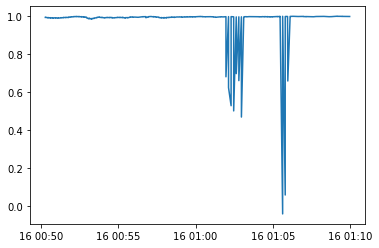

In [43]:
plt.plot(photos["photo_time"], photos["corr_to_prev"])